# Ceneo Analyzer

1. Wyświetlenie listy kodów produkktów o których zostały pobrane opinie
2. Pobranie od użytkownika kodu produktu którego statystyki mają być policzone
3. Wczytanie z pliku JSON opinii o produkcie którego statystyki mają być policzone
4. Policzenie podstawowych statystyk
5. Przygotowanie wykresów
    - Histogram częstości ocen produktu
    - Wykres udziału rekomendacji w opiniach

In [2]:
import os, pandas as pd, numpy as np
from matplotlib import pyplot as plt

In [5]:
print(*[filename.split(".")[0] for filename in os.listdir('opinions')])
product_code = input("Podaj kod produktu z Ceneo.pl: ")

108481121 114228736 124893467 28020568 63717975


In [6]:
opinions = pd.read_json(f"opinions/{product_code}.json")
opinions.stars = opinions.stars.apply(lambda s: s.split('/')[0].replace(',','.')).astype(float)

In [9]:
opinions

,opinion_id,author,recommendation,stars,content,pros,cons,post_date,purchase_date,useful,useless
0,13447431,Grzegorz Marcin,Grzegorz Marcin,4/5,"Fajna mała zgrabna, obsługa z telefonu to duży...","[cena, głośność pracy, jakość / cena, kompakto...",[],2020-11-25 19:21:34,2020-10-26 10:32:34,0,0
1,18199560,b...9,b...9,5/5,Sama drukarka bez zarzutu. Lekki zgrzyt przy i...,"[cena, głośność pracy, jakość / cena, jakość o...","[banalna instalacja, łatwość instalacji]",2023-12-12 10:38:39,2023-12-07 15:22:10,0,0
2,14396705,z...n,z...n,5/5,Drukarka ma ładny jasny szary kolor z ciemną p...,[],[],2021-05-03 18:01:45,2021-04-27 07:40:13,0,0
3,14934199,a...a,a...a,5/5,Jestem zadowolona z wydajności drukarki. Jest ...,"[głośność pracy, jakość wydruku, szybkość wydr...",[],2021-09-08 17:24:17,2020-09-11 15:51:09,0,0
4,16409142,s...a,s...a,"3,5/5",Na razie wydaje się być ok. Choć instalacja wy...,[],[],2022-08-11 00:10:31,2022-07-29 13:01:49,0,0
5,16578265,n...l,n...l,"4,5/5","niedroga, prosta w obsłudze, niestety nie dzia...",[],[],2022-09-30 07:25:42,2022-09-09 17:23:29,0,0
6,15469448,c...7,c...7,5/5,"Do zastosowań domowych elegancka, mała, zgrabn...",[],[],2021-12-29 18:07:58,2021-11-28 19:11:07,0,0
7,17122032,a...4,a...4,"4,5/5","Prosta, elegancka, na razie jestem zadowolona","[cena, głośność pracy, jakość wydruku, szybkoś...",[],2023-02-08 23:10:13,2023-01-27 15:04:18,0,0
8,12103110,Użytkownik Ceneo,Użytkownik Ceneo,5/5,Fajna drukareczka....Polecam wszystkim,[],[],2020-04-09 09:26:24,2020-03-31 13:15:52,0,0
9,17983637,i...o,i...o,5/5,Rewelacyjny sprzęt w tej cenie,"[cena, jakość / cena, kompaktowa budowa, szybk...",[],2023-10-10 07:53:25,2023-09-26 13:45:32,0,0


In [7]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_stars = opinions.stars.mean()
average_stars

4.4

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.5'),
  Text(2, 0, '1.0'),
  Text(3, 0, '1.5'),
  Text(4, 0, '2.0'),
  Text(5, 0, '2.5'),
  Text(6, 0, '3.0'),
  Text(7, 0, '3.5'),
  Text(8, 0, '4.0'),
  Text(9, 0, '4.5'),
  Text(10, 0, '5.0')])

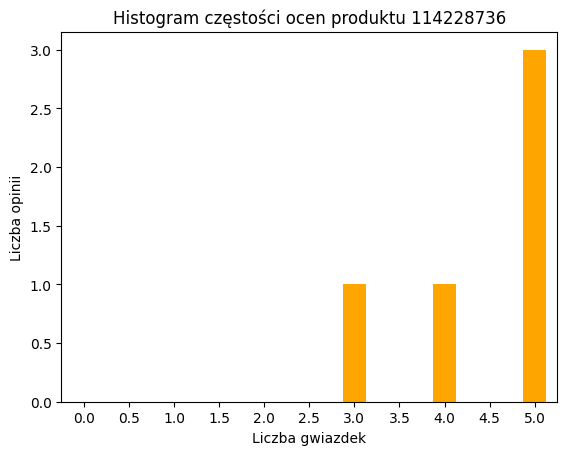

In [8]:
stars_distr = opinions.stars.value_counts().reindex(np.arange(0,5.5,0.5),fill_value=0)
stars_distr.plot.bar(color='orange')
plt.title(f"Histogram częstości ocen produktu {product_code}")
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.xticks(rotation=0)

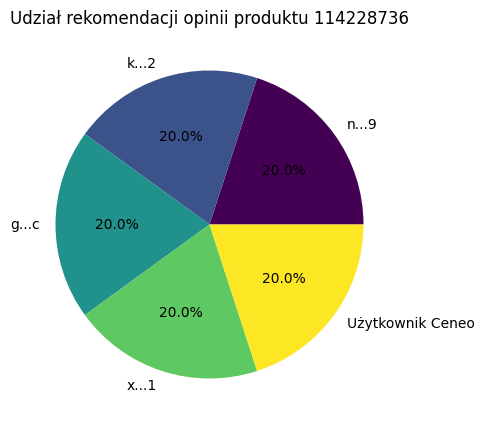

In [9]:
recommendation_distr = opinions.recommendation.value_counts()

# Tworzenie wykresu kołowego
plt.figure(figsize=(5, 5))
recommendation_distr.plot.pie(autopct='%1.1f%%', colors=plt.cm.viridis(np.linspace(0, 1, len(recommendation_distr))))

plt.title(f"Udział rekomendacji opinii produktu {product_code}")
plt.ylabel("")  # Usunięcie etykiety osi Y

plt.show()